## **Problem Statement**: Used Car Price Analysis

#### Understand how various factors like brand, fuel type, transmission, year of manufacture, kilometers driven, and location affect the price of used cars.
#### Identify pricing trends and patterns across cities and car categories.



# **Data Scrapping** : Used Cars

In [6]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service as EdgeService
from selenium.webdriver.edge.options import Options as EdgeOptions           # importing Libraries
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
#from webdriver_manager.microsoft import EdegeChromiumDriverM
try:
    options = EdgeOptions()
    options.add_argument("--start-maximized")                               # setup browser
    service = EdgeService("C:\\Webdrivers\\msedgedriver.exe")
    driver=webdriver.Edge(service=service, options=options)
    driver.get("https://www.google.com")
    print("Driver started successfully with latest version")
except Exception as e:
    print(f"Error starting WebDriver: {e}")

else:
    print("No errors! Proceed with scraping...")



    locations = ["bangalore", "delhi", "mumbai", "hyderabad", "chennai","lucknow","kolkata","pune","jaipur","gurgaon","noida","delhi-ncr"]  # Add more cities here
    
    all_cars = []
    
    for city in locations:
        print(f"Scraping city: {city}...")
        url = f"https://www.spinny.com/used-cars-in-{city}/s/"               #scrapping website
    
        driver = webdriver.Edge(service=service, options=options)             #web driver
        driver.get(url)
        time.sleep(5)
    
        last_height = driver.execute_script("return document.body.scrollHeight")
        for _ in range(30):                                                               # for loop for iterate pages
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(2)
            new_height = driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height
    
        soup = BeautifulSoup(driver.page_source, "html.parser")                             # using Beautifulsoup
        driver.quit()
    
        Car_Name, Price, KMS, Fuel, Transmission, Location,Emi = [], [], [], [], [], [], []
    
        cars = soup.find_all("div", class_="CarListingCardDetail__productDetailContainer")
        for car in cars:
            name = car.find("h3", class_="ListingBrandModelDetail__makeModelInfo ListingBrandModelDetail__medium")
            Car_Name.append(name.text.strip() if name else np.nan)
    
            price = car.find("li", class_="ListingPricingDetail__price ListingPricingDetail__medium")
            Price.append(price.text.strip() if price else np.nan)
    
            loc = car.find("span", class_="HubDetails__hubAddress")
            Location.append(loc.text.strip() if loc else city.title())  # Default to city if not found
    
            emi = car.find("li", class_="ListingPricingDetail__emi ListingPricingDetail__medium")
            Emi.append(emi.text.strip() if emi else np.nan)
    
        sections = soup.find_all("ul", class_="CarListingCardDetail__more")
        for sec in sections:
            li_tags = sec.find_all("li")
            if len(li_tags) >= 3:
                KMS.append(li_tags[0].text.strip())
                Fuel.append(li_tags[1].text.strip())
                Transmission.append(li_tags[2].text.strip())
            else:
                KMS.append(np.nan)
                Fuel.append(np.nan)
                Transmission.append(np.nan)
    
        min_len = min(len(Car_Name), len(Price), len(KMS), len(Fuel), len(Transmission), len(Location),len(Emi))
        df = pd.DataFrame({
            "City": [city.title()] * min_len,
            "Car_Name": Car_Name[:min_len],
            "Price": Price[:min_len],
            "KMS": KMS[:min_len],
            "Fuel": Fuel[:min_len],
            "Transmission": Transmission[:min_len],
            "Location": Location[:min_len],
            "Emi":Emi[:min_len]
        })
    
        all_cars.append(df)
    
    # Combine all cities into one DataFrame
    final_df = pd.concat(all_cars, ignore_index=True)
    
    final_df
finally:
    print("Update the Driver")
    
    print("Driver could not start. Please fix the issue before retrying.")

Driver started successfully with latest version
No errors! Proceed with scraping...
Scraping city: bangalore...
Scraping city: delhi...
Scraping city: mumbai...
Scraping city: hyderabad...
Scraping city: chennai...
Scraping city: lucknow...
Scraping city: kolkata...
Scraping city: pune...
Scraping city: jaipur...
Scraping city: gurgaon...
Scraping city: noida...
Scraping city: delhi-ncr...
Update the Driver
Driver could not start. Please fix the issue before retrying.


### save dataframe

In [7]:
final_df.to_csv("spinny_project.csv",index=False)

## importing neccesary libraries 

In [196]:
import pandas as pd
import numpy as np
import time
import warnings                                                       # this library used for a removing error warning
warnings.simplefilter(action='ignore', category=FutureWarning)

### load the dataframe

In [237]:
df=pd.read_csv("spinny_project.csv")
df

,City,Car_Name,Price,KMS,Fuel,Transmission,Location,Emi
0,Bangalore,2024 Maruti FronxAlpha 1.0L Turbo 6 AT Dual Tone,12.82 Lakh,17.5K km,petrol,automatic,Yelahanka,"EMI ₹22,047/m*"
1,Bangalore,2020 Renault TriberRXT,4.90 Lakh₹4.92 Lakh,101.5K km,petrol,manual,"Mantri Mall, Malleshwaram","EMI ₹8,378/m*"
2,Bangalore,2020 Jaguar XF2.0L Diesel Prestige,32 Lakh,49K km,diesel,automatic,Yelahanka,"EMI ₹55,036/m*"
3,Bangalore,2016 Hyundai Elite i20Asta 1.4 CRDI (O),6.46 Lakh,61.5K km,diesel,manual,Mysore Road,"EMI ₹11,001/m*"
4,Bangalore,2011 Maruti EstiloVXi BS-IV,2.25 Lakh,71K km,petrol,manual,"Mantri Mall, Malleshwaram","EMI ₹16,077/m*"
...,...,...,...,...,...,...,...,...
9343,Delhi-Ncr,2018 Maruti CelerioZXi AMT,4.17 Lakh,62K km,petrol,automatic,"Taj Vivanta, Dwarka, Delhi","EMI ₹7,101/m*"
9344,Delhi-Ncr,2017 Hyundai Elite i20Sportz 1.2,4.80 Lakh,73K km,petrol,manual,"Gaur City Mall, Noida","EMI ₹8,174/m*"
9345,Delhi-Ncr,2015 Hyundai Elite i20Magna 1.2,3.64 Lakh,99K km,petrol,manual,"Sector 29, Gurgaon","EMI ₹6,625/m*"
9346,Delhi-Ncr,2018 Volkswagen AmeoHighline1.2L Plus (P),3.67 Lakh,74K km,petrol,manual,"Indirapuram, Ghaziabad","EMI ₹5,859/m*"


## Understanding the dataframe

In [238]:
df.shape


(9348, 8)

In [239]:
df.head()

,City,Car_Name,Price,KMS,Fuel,Transmission,Location,Emi
0,Bangalore,2024 Maruti FronxAlpha 1.0L Turbo 6 AT Dual Tone,12.82 Lakh,17.5K km,petrol,automatic,Yelahanka,"EMI ₹22,047/m*"
1,Bangalore,2020 Renault TriberRXT,4.90 Lakh₹4.92 Lakh,101.5K km,petrol,manual,"Mantri Mall, Malleshwaram","EMI ₹8,378/m*"
2,Bangalore,2020 Jaguar XF2.0L Diesel Prestige,32 Lakh,49K km,diesel,automatic,Yelahanka,"EMI ₹55,036/m*"
3,Bangalore,2016 Hyundai Elite i20Asta 1.4 CRDI (O),6.46 Lakh,61.5K km,diesel,manual,Mysore Road,"EMI ₹11,001/m*"
4,Bangalore,2011 Maruti EstiloVXi BS-IV,2.25 Lakh,71K km,petrol,manual,"Mantri Mall, Malleshwaram","EMI ₹16,077/m*"


In [240]:
df.tail()

,City,Car_Name,Price,KMS,Fuel,Transmission,Location,Emi
9343,Delhi-Ncr,2018 Maruti CelerioZXi AMT,4.17 Lakh,62K km,petrol,automatic,"Taj Vivanta, Dwarka, Delhi","EMI ₹7,101/m*"
9344,Delhi-Ncr,2017 Hyundai Elite i20Sportz 1.2,4.80 Lakh,73K km,petrol,manual,"Gaur City Mall, Noida","EMI ₹8,174/m*"
9345,Delhi-Ncr,2015 Hyundai Elite i20Magna 1.2,3.64 Lakh,99K km,petrol,manual,"Sector 29, Gurgaon","EMI ₹6,625/m*"
9346,Delhi-Ncr,2018 Volkswagen AmeoHighline1.2L Plus (P),3.67 Lakh,74K km,petrol,manual,"Indirapuram, Ghaziabad","EMI ₹5,859/m*"
9347,Delhi-Ncr,2017 Honda CityV Petrol,6.60 Lakh,44.5K km,petrol,manual,"GNB Mall, Ghaziabad","EMI ₹11,239/m*"


In [241]:
df.sample(15)

,City,Car_Name,Price,KMS,Fuel,Transmission,Location,Emi
4653,Lucknow,2021 Mahindra TharLX Hard Top Petrol AT 4WD,12.04 Lakh₹12.24 Lakh,27K km,petrol,automatic,Faizabad Road,"EMI ₹21,049/m*"
4923,Lucknow,2025 Maruti CiazZeta 1.5 AT,10.59 Lakh₹10.78 Lakh,1K km,petrol,automatic,Lucknow,"EMI ₹18,539/m*"
6514,Jaipur,2024 Maruti Alto K10VXi (O),4.89 Lakh₹5.07 Lakh,2K km,petrol,manual,"Ajmer Road, Jaipur","EMI ₹8,823/m*"
801,Bangalore,2020 Maruti SwiftZXi,6.62 Lakh,45K km,petrol,manual,"Vega Mall, BTM 2nd Stage","EMI ₹11,273/m*"
855,Bangalore,2025 Tata CurvvPure Plus 1.2 Revotron Petrol 7DCA,13.50 Lakh₹13.71 Lakh,3K km,petrol,automatic,Bellandur,"EMI ₹23,579/m*"
3368,Hyderabad,2022 Kia SonetAnniversary Edition 1.0 iMT,9.14 Lakh₹9.34 Lakh,20.5K km,petrol,manual,"DSL Virtue Mall, Uppal","EMI ₹15,905/m*"
3733,Hyderabad,2023 Tata NexonXZA Plus (HS),10.11 Lakh₹10.33 Lakh,7K km,petrol,automatic,"Forum Sujana Mall, Kukatpally","EMI ₹17,764/m*"
1858,Delhi,2016 Maruti BalenoAlpha 1.2,4.44 Lakh,79.5K km,petrol,manual,"Gaur City Mall, Noida","EMI ₹7,561/m*"
4957,Kolkata,2017 Renault KwidRXL,2.33 Lakh,33K km,petrol,manual,"City Center 2 Mall, Rajarhat","EMI ₹3,967/m*"
3326,Hyderabad,2022 Kia SeltosX Line 1.4 DCT,15.10 Lakh₹15.30 Lakh,71.5K km,petrol,automatic,"Forum Sujana Mall, Kukatpally","EMI ₹26,310/m*"


In [242]:
df.columns

Index(['City', 'Car_Name', 'Price', 'KMS', 'Fuel', 'Transmission', 'Location',
       'Emi'],
      dtype='object')

In [243]:
df['Price'].min()

'1.42 Lakh'

In [244]:
df.dtypes

City            object
Car_Name        object
Price           object
KMS             object
Fuel            object
Transmission    object
Location        object
Emi             object
dtype: object

In [245]:
df.index

RangeIndex(start=0, stop=9348, step=1)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9348 entries, 0 to 9347
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          9348 non-null   object
 1   Car_Name      9348 non-null   object
 2   Price         9348 non-null   object
 3   KMS           9348 non-null   object
 4   Fuel          9348 non-null   object
 5   Transmission  9348 non-null   object
 6   Location      9348 non-null   object
 7   Emi           9325 non-null   object
dtypes: object(8)
memory usage: 584.4+ KB


In [247]:
df.describe()

,City,Car_Name,Price,KMS,Fuel,Transmission,Location,Emi
count,9348,9348,9348,9348,9348,9348,9348,9325
unique,12,3060,3814,282,6,2,51,2754
top,Delhi-Ncr,2021 Kia SonetHTX 1.0 iMT,3.19 Lakh,28K km,petrol,manual,"Gaur City Mall, Noida","EMI ₹8,327/m*"
freq,1362,51,25,96,7993,5979,699,29


## Data Cleaning

#### handling duplicates

In [248]:
df.duplicated().sum()          # this function used for checking a duplicates 

1

In [249]:
df=df.drop_duplicates()
df

,City,Car_Name,Price,KMS,Fuel,Transmission,Location,Emi
0,Bangalore,2024 Maruti FronxAlpha 1.0L Turbo 6 AT Dual Tone,12.82 Lakh,17.5K km,petrol,automatic,Yelahanka,"EMI ₹22,047/m*"
1,Bangalore,2020 Renault TriberRXT,4.90 Lakh₹4.92 Lakh,101.5K km,petrol,manual,"Mantri Mall, Malleshwaram","EMI ₹8,378/m*"
2,Bangalore,2020 Jaguar XF2.0L Diesel Prestige,32 Lakh,49K km,diesel,automatic,Yelahanka,"EMI ₹55,036/m*"
3,Bangalore,2016 Hyundai Elite i20Asta 1.4 CRDI (O),6.46 Lakh,61.5K km,diesel,manual,Mysore Road,"EMI ₹11,001/m*"
4,Bangalore,2011 Maruti EstiloVXi BS-IV,2.25 Lakh,71K km,petrol,manual,"Mantri Mall, Malleshwaram","EMI ₹16,077/m*"
...,...,...,...,...,...,...,...,...
9343,Delhi-Ncr,2018 Maruti CelerioZXi AMT,4.17 Lakh,62K km,petrol,automatic,"Taj Vivanta, Dwarka, Delhi","EMI ₹7,101/m*"
9344,Delhi-Ncr,2017 Hyundai Elite i20Sportz 1.2,4.80 Lakh,73K km,petrol,manual,"Gaur City Mall, Noida","EMI ₹8,174/m*"
9345,Delhi-Ncr,2015 Hyundai Elite i20Magna 1.2,3.64 Lakh,99K km,petrol,manual,"Sector 29, Gurgaon","EMI ₹6,625/m*"
9346,Delhi-Ncr,2018 Volkswagen AmeoHighline1.2L Plus (P),3.67 Lakh,74K km,petrol,manual,"Indirapuram, Ghaziabad","EMI ₹5,859/m*"


#### missing values

In [250]:
df.isnull().sum()

City             0
Car_Name         0
Price            0
KMS              0
Fuel             0
Transmission     0
Location         0
Emi             23
dtype: int64

In [251]:
df=df.dropna()

In [252]:
df

,City,Car_Name,Price,KMS,Fuel,Transmission,Location,Emi
0,Bangalore,2024 Maruti FronxAlpha 1.0L Turbo 6 AT Dual Tone,12.82 Lakh,17.5K km,petrol,automatic,Yelahanka,"EMI ₹22,047/m*"
1,Bangalore,2020 Renault TriberRXT,4.90 Lakh₹4.92 Lakh,101.5K km,petrol,manual,"Mantri Mall, Malleshwaram","EMI ₹8,378/m*"
2,Bangalore,2020 Jaguar XF2.0L Diesel Prestige,32 Lakh,49K km,diesel,automatic,Yelahanka,"EMI ₹55,036/m*"
3,Bangalore,2016 Hyundai Elite i20Asta 1.4 CRDI (O),6.46 Lakh,61.5K km,diesel,manual,Mysore Road,"EMI ₹11,001/m*"
4,Bangalore,2011 Maruti EstiloVXi BS-IV,2.25 Lakh,71K km,petrol,manual,"Mantri Mall, Malleshwaram","EMI ₹16,077/m*"
...,...,...,...,...,...,...,...,...
9343,Delhi-Ncr,2018 Maruti CelerioZXi AMT,4.17 Lakh,62K km,petrol,automatic,"Taj Vivanta, Dwarka, Delhi","EMI ₹7,101/m*"
9344,Delhi-Ncr,2017 Hyundai Elite i20Sportz 1.2,4.80 Lakh,73K km,petrol,manual,"Gaur City Mall, Noida","EMI ₹8,174/m*"
9345,Delhi-Ncr,2015 Hyundai Elite i20Magna 1.2,3.64 Lakh,99K km,petrol,manual,"Sector 29, Gurgaon","EMI ₹6,625/m*"
9346,Delhi-Ncr,2018 Volkswagen AmeoHighline1.2L Plus (P),3.67 Lakh,74K km,petrol,manual,"Indirapuram, Ghaziabad","EMI ₹5,859/m*"


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9324 entries, 0 to 9347
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          9324 non-null   object
 1   Car_Name      9324 non-null   object
 2   Price         9324 non-null   object
 3   KMS           9324 non-null   object
 4   Fuel          9324 non-null   object
 5   Transmission  9324 non-null   object
 6   Location      9324 non-null   object
 7   Emi           9324 non-null   object
dtypes: object(8)
memory usage: 655.6+ KB


### using regular expression (REGEX) to do some manupluations and cleaning the dataset

In [254]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [255]:
df['Year'] = df['Car_Name'].str.extract(r'^(\d{4})')
df

C:\Users\mbdin\AppData\Local\Temp\ipykernel_18768\2343217176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Car_Name'].str.extract(r'^(\d{4})')


,City,Car_Name,Price,KMS,Fuel,Transmission,Location,Emi,Year
0,Bangalore,2024 Maruti FronxAlpha 1.0L Turbo 6 AT Dual Tone,12.82 Lakh,17.5K km,petrol,automatic,Yelahanka,"EMI ₹22,047/m*",2024
1,Bangalore,2020 Renault TriberRXT,4.90 Lakh₹4.92 Lakh,101.5K km,petrol,manual,"Mantri Mall, Malleshwaram","EMI ₹8,378/m*",2020
2,Bangalore,2020 Jaguar XF2.0L Diesel Prestige,32 Lakh,49K km,diesel,automatic,Yelahanka,"EMI ₹55,036/m*",2020
3,Bangalore,2016 Hyundai Elite i20Asta 1.4 CRDI (O),6.46 Lakh,61.5K km,diesel,manual,Mysore Road,"EMI ₹11,001/m*",2016
4,Bangalore,2011 Maruti EstiloVXi BS-IV,2.25 Lakh,71K km,petrol,manual,"Mantri Mall, Malleshwaram","EMI ₹16,077/m*",2011
...,...,...,...,...,...,...,...,...,...
9343,Delhi-Ncr,2018 Maruti CelerioZXi AMT,4.17 Lakh,62K km,petrol,automatic,"Taj Vivanta, Dwarka, Delhi","EMI ₹7,101/m*",2018
9344,Delhi-Ncr,2017 Hyundai Elite i20Sportz 1.2,4.80 Lakh,73K km,petrol,manual,"Gaur City Mall, Noida","EMI ₹8,174/m*",2017
9345,Delhi-Ncr,2015 Hyundai Elite i20Magna 1.2,3.64 Lakh,99K km,petrol,manual,"Sector 29, Gurgaon","EMI ₹6,625/m*",2015
9346,Delhi-Ncr,2018 Volkswagen AmeoHighline1.2L Plus (P),3.67 Lakh,74K km,petrol,manual,"Indirapuram, Ghaziabad","EMI ₹5,859/m*",2018


###### using regex seperating a brand name and model

In [256]:
df['Car'] = df['Car_Name'].str.replace(r'^\d{4}\s+', '', regex=True)
df


C:\Users\mbdin\AppData\Local\Temp\ipykernel_18768\2677297662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car'] = df['Car_Name'].str.replace(r'^\d{4}\s+', '', regex=True)


,City,Car_Name,Price,KMS,Fuel,Transmission,Location,Emi,Year,Car
0,Bangalore,2024 Maruti FronxAlpha 1.0L Turbo 6 AT Dual Tone,12.82 Lakh,17.5K km,petrol,automatic,Yelahanka,"EMI ₹22,047/m*",2024,Maruti FronxAlpha 1.0L Turbo 6 AT Dual Tone
1,Bangalore,2020 Renault TriberRXT,4.90 Lakh₹4.92 Lakh,101.5K km,petrol,manual,"Mantri Mall, Malleshwaram","EMI ₹8,378/m*",2020,Renault TriberRXT
2,Bangalore,2020 Jaguar XF2.0L Diesel Prestige,32 Lakh,49K km,diesel,automatic,Yelahanka,"EMI ₹55,036/m*",2020,Jaguar XF2.0L Diesel Prestige
3,Bangalore,2016 Hyundai Elite i20Asta 1.4 CRDI (O),6.46 Lakh,61.5K km,diesel,manual,Mysore Road,"EMI ₹11,001/m*",2016,Hyundai Elite i20Asta 1.4 CRDI (O)
4,Bangalore,2011 Maruti EstiloVXi BS-IV,2.25 Lakh,71K km,petrol,manual,"Mantri Mall, Malleshwaram","EMI ₹16,077/m*",2011,Maruti EstiloVXi BS-IV
...,...,...,...,...,...,...,...,...,...,...
9343,Delhi-Ncr,2018 Maruti CelerioZXi AMT,4.17 Lakh,62K km,petrol,automatic,"Taj Vivanta, Dwarka, Delhi","EMI ₹7,101/m*",2018,Maruti CelerioZXi AMT
9344,Delhi-Ncr,2017 Hyundai Elite i20Sportz 1.2,4.80 Lakh,73K km,petrol,manual,"Gaur City Mall, Noida","EMI ₹8,174/m*",2017,Hyundai Elite i20Sportz 1.2
9345,Delhi-Ncr,2015 Hyundai Elite i20Magna 1.2,3.64 Lakh,99K km,petrol,manual,"Sector 29, Gurgaon","EMI ₹6,625/m*",2015,Hyundai Elite i20Magna 1.2
9346,Delhi-Ncr,2018 Volkswagen AmeoHighline1.2L Plus (P),3.67 Lakh,74K km,petrol,manual,"Indirapuram, Ghaziabad","EMI ₹5,859/m*",2018,Volkswagen AmeoHighline1.2L Plus (P)


In [257]:
df.drop(columns=['Car_Name'] )      # droping column

,City,Price,KMS,Fuel,Transmission,Location,Emi,Year,Car
0,Bangalore,12.82 Lakh,17.5K km,petrol,automatic,Yelahanka,"EMI ₹22,047/m*",2024,Maruti FronxAlpha 1.0L Turbo 6 AT Dual Tone
1,Bangalore,4.90 Lakh₹4.92 Lakh,101.5K km,petrol,manual,"Mantri Mall, Malleshwaram","EMI ₹8,378/m*",2020,Renault TriberRXT
2,Bangalore,32 Lakh,49K km,diesel,automatic,Yelahanka,"EMI ₹55,036/m*",2020,Jaguar XF2.0L Diesel Prestige
3,Bangalore,6.46 Lakh,61.5K km,diesel,manual,Mysore Road,"EMI ₹11,001/m*",2016,Hyundai Elite i20Asta 1.4 CRDI (O)
4,Bangalore,2.25 Lakh,71K km,petrol,manual,"Mantri Mall, Malleshwaram","EMI ₹16,077/m*",2011,Maruti EstiloVXi BS-IV
...,...,...,...,...,...,...,...,...,...
9343,Delhi-Ncr,4.17 Lakh,62K km,petrol,automatic,"Taj Vivanta, Dwarka, Delhi","EMI ₹7,101/m*",2018,Maruti CelerioZXi AMT
9344,Delhi-Ncr,4.80 Lakh,73K km,petrol,manual,"Gaur City Mall, Noida","EMI ₹8,174/m*",2017,Hyundai Elite i20Sportz 1.2
9345,Delhi-Ncr,3.64 Lakh,99K km,petrol,manual,"Sector 29, Gurgaon","EMI ₹6,625/m*",2015,Hyundai Elite i20Magna 1.2
9346,Delhi-Ncr,3.67 Lakh,74K km,petrol,manual,"Indirapuram, Ghaziabad","EMI ₹5,859/m*",2018,Volkswagen AmeoHighline1.2L Plus (P)


###### here reasigning a columns

In [258]:
df = df[['Car', 'Year','City', 'KMS', 'Fuel', 'Transmission', 'Price','Emi']]                 # arranging columns sequntially
df

,Car,Year,City,KMS,Fuel,Transmission,Price,Emi
0,Maruti FronxAlpha 1.0L Turbo 6 AT Dual Tone,2024,Bangalore,17.5K km,petrol,automatic,12.82 Lakh,"EMI ₹22,047/m*"
1,Renault TriberRXT,2020,Bangalore,101.5K km,petrol,manual,4.90 Lakh₹4.92 Lakh,"EMI ₹8,378/m*"
2,Jaguar XF2.0L Diesel Prestige,2020,Bangalore,49K km,diesel,automatic,32 Lakh,"EMI ₹55,036/m*"
3,Hyundai Elite i20Asta 1.4 CRDI (O),2016,Bangalore,61.5K km,diesel,manual,6.46 Lakh,"EMI ₹11,001/m*"
4,Maruti EstiloVXi BS-IV,2011,Bangalore,71K km,petrol,manual,2.25 Lakh,"EMI ₹16,077/m*"
...,...,...,...,...,...,...,...,...
9343,Maruti CelerioZXi AMT,2018,Delhi-Ncr,62K km,petrol,automatic,4.17 Lakh,"EMI ₹7,101/m*"
9344,Hyundai Elite i20Sportz 1.2,2017,Delhi-Ncr,73K km,petrol,manual,4.80 Lakh,"EMI ₹8,174/m*"
9345,Hyundai Elite i20Magna 1.2,2015,Delhi-Ncr,99K km,petrol,manual,3.64 Lakh,"EMI ₹6,625/m*"
9346,Volkswagen AmeoHighline1.2L Plus (P),2018,Delhi-Ncr,74K km,petrol,manual,3.67 Lakh,"EMI ₹5,859/m*"


##### here extracting brand name from car column

In [259]:
df['Brand'] = df['Car'].str.extract(r'^(\w+)')
df

C:\Users\mbdin\AppData\Local\Temp\ipykernel_18768\1632566837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Brand'] = df['Car'].str.extract(r'^(\w+)')


,Car,Year,City,KMS,Fuel,Transmission,Price,Emi,Brand
0,Maruti FronxAlpha 1.0L Turbo 6 AT Dual Tone,2024,Bangalore,17.5K km,petrol,automatic,12.82 Lakh,"EMI ₹22,047/m*",Maruti
1,Renault TriberRXT,2020,Bangalore,101.5K km,petrol,manual,4.90 Lakh₹4.92 Lakh,"EMI ₹8,378/m*",Renault
2,Jaguar XF2.0L Diesel Prestige,2020,Bangalore,49K km,diesel,automatic,32 Lakh,"EMI ₹55,036/m*",Jaguar
3,Hyundai Elite i20Asta 1.4 CRDI (O),2016,Bangalore,61.5K km,diesel,manual,6.46 Lakh,"EMI ₹11,001/m*",Hyundai
4,Maruti EstiloVXi BS-IV,2011,Bangalore,71K km,petrol,manual,2.25 Lakh,"EMI ₹16,077/m*",Maruti
...,...,...,...,...,...,...,...,...,...
9343,Maruti CelerioZXi AMT,2018,Delhi-Ncr,62K km,petrol,automatic,4.17 Lakh,"EMI ₹7,101/m*",Maruti
9344,Hyundai Elite i20Sportz 1.2,2017,Delhi-Ncr,73K km,petrol,manual,4.80 Lakh,"EMI ₹8,174/m*",Hyundai
9345,Hyundai Elite i20Magna 1.2,2015,Delhi-Ncr,99K km,petrol,manual,3.64 Lakh,"EMI ₹6,625/m*",Hyundai
9346,Volkswagen AmeoHighline1.2L Plus (P),2018,Delhi-Ncr,74K km,petrol,manual,3.67 Lakh,"EMI ₹5,859/m*",Volkswagen


##### again reasigning a colums

In [260]:
df['Model and Variant'] = df['Car']
df

,Car,Year,City,KMS,Fuel,Transmission,Price,Emi,Brand,Model and Variant
0,Maruti FronxAlpha 1.0L Turbo 6 AT Dual Tone,2024,Bangalore,17.5K km,petrol,automatic,12.82 Lakh,"EMI ₹22,047/m*",Maruti,Maruti FronxAlpha 1.0L Turbo 6 AT Dual Tone
1,Renault TriberRXT,2020,Bangalore,101.5K km,petrol,manual,4.90 Lakh₹4.92 Lakh,"EMI ₹8,378/m*",Renault,Renault TriberRXT
2,Jaguar XF2.0L Diesel Prestige,2020,Bangalore,49K km,diesel,automatic,32 Lakh,"EMI ₹55,036/m*",Jaguar,Jaguar XF2.0L Diesel Prestige
3,Hyundai Elite i20Asta 1.4 CRDI (O),2016,Bangalore,61.5K km,diesel,manual,6.46 Lakh,"EMI ₹11,001/m*",Hyundai,Hyundai Elite i20Asta 1.4 CRDI (O)
4,Maruti EstiloVXi BS-IV,2011,Bangalore,71K km,petrol,manual,2.25 Lakh,"EMI ₹16,077/m*",Maruti,Maruti EstiloVXi BS-IV
...,...,...,...,...,...,...,...,...,...,...
9343,Maruti CelerioZXi AMT,2018,Delhi-Ncr,62K km,petrol,automatic,4.17 Lakh,"EMI ₹7,101/m*",Maruti,Maruti CelerioZXi AMT
9344,Hyundai Elite i20Sportz 1.2,2017,Delhi-Ncr,73K km,petrol,manual,4.80 Lakh,"EMI ₹8,174/m*",Hyundai,Hyundai Elite i20Sportz 1.2
9345,Hyundai Elite i20Magna 1.2,2015,Delhi-Ncr,99K km,petrol,manual,3.64 Lakh,"EMI ₹6,625/m*",Hyundai,Hyundai Elite i20Magna 1.2
9346,Volkswagen AmeoHighline1.2L Plus (P),2018,Delhi-Ncr,74K km,petrol,manual,3.67 Lakh,"EMI ₹5,859/m*",Volkswagen,Volkswagen AmeoHighline1.2L Plus (P)


In [261]:
df.drop(columns=['Car'] , inplace=True )  
df

,Year,City,KMS,Fuel,Transmission,Price,Emi,Brand,Model and Variant
0,2024,Bangalore,17.5K km,petrol,automatic,12.82 Lakh,"EMI ₹22,047/m*",Maruti,Maruti FronxAlpha 1.0L Turbo 6 AT Dual Tone
1,2020,Bangalore,101.5K km,petrol,manual,4.90 Lakh₹4.92 Lakh,"EMI ₹8,378/m*",Renault,Renault TriberRXT
2,2020,Bangalore,49K km,diesel,automatic,32 Lakh,"EMI ₹55,036/m*",Jaguar,Jaguar XF2.0L Diesel Prestige
3,2016,Bangalore,61.5K km,diesel,manual,6.46 Lakh,"EMI ₹11,001/m*",Hyundai,Hyundai Elite i20Asta 1.4 CRDI (O)
4,2011,Bangalore,71K km,petrol,manual,2.25 Lakh,"EMI ₹16,077/m*",Maruti,Maruti EstiloVXi BS-IV
...,...,...,...,...,...,...,...,...,...
9343,2018,Delhi-Ncr,62K km,petrol,automatic,4.17 Lakh,"EMI ₹7,101/m*",Maruti,Maruti CelerioZXi AMT
9344,2017,Delhi-Ncr,73K km,petrol,manual,4.80 Lakh,"EMI ₹8,174/m*",Hyundai,Hyundai Elite i20Sportz 1.2
9345,2015,Delhi-Ncr,99K km,petrol,manual,3.64 Lakh,"EMI ₹6,625/m*",Hyundai,Hyundai Elite i20Magna 1.2
9346,2018,Delhi-Ncr,74K km,petrol,manual,3.67 Lakh,"EMI ₹5,859/m*",Volkswagen,Volkswagen AmeoHighline1.2L Plus (P)


In [262]:
df['Model and Variant'] = df['Model and Variant'].str.replace(r'^\w+\s+', '', regex=True)
df

,Year,City,KMS,Fuel,Transmission,Price,Emi,Brand,Model and Variant
0,2024,Bangalore,17.5K km,petrol,automatic,12.82 Lakh,"EMI ₹22,047/m*",Maruti,FronxAlpha 1.0L Turbo 6 AT Dual Tone
1,2020,Bangalore,101.5K km,petrol,manual,4.90 Lakh₹4.92 Lakh,"EMI ₹8,378/m*",Renault,TriberRXT
2,2020,Bangalore,49K km,diesel,automatic,32 Lakh,"EMI ₹55,036/m*",Jaguar,XF2.0L Diesel Prestige
3,2016,Bangalore,61.5K km,diesel,manual,6.46 Lakh,"EMI ₹11,001/m*",Hyundai,Elite i20Asta 1.4 CRDI (O)
4,2011,Bangalore,71K km,petrol,manual,2.25 Lakh,"EMI ₹16,077/m*",Maruti,EstiloVXi BS-IV
...,...,...,...,...,...,...,...,...,...
9343,2018,Delhi-Ncr,62K km,petrol,automatic,4.17 Lakh,"EMI ₹7,101/m*",Maruti,CelerioZXi AMT
9344,2017,Delhi-Ncr,73K km,petrol,manual,4.80 Lakh,"EMI ₹8,174/m*",Hyundai,Elite i20Sportz 1.2
9345,2015,Delhi-Ncr,99K km,petrol,manual,3.64 Lakh,"EMI ₹6,625/m*",Hyundai,Elite i20Magna 1.2
9346,2018,Delhi-Ncr,74K km,petrol,manual,3.67 Lakh,"EMI ₹5,859/m*",Volkswagen,AmeoHighline1.2L Plus (P)


##### removing a "KM" ina KMS column

In [263]:
df= df[['Brand', 'Model and Variant', 'Year', 'City', 'KMS', 'Fuel', 'Transmission', 'Price','Emi']]
df

,Brand,Model and Variant,Year,City,KMS,Fuel,Transmission,Price,Emi
0,Maruti,FronxAlpha 1.0L Turbo 6 AT Dual Tone,2024,Bangalore,17.5K km,petrol,automatic,12.82 Lakh,"EMI ₹22,047/m*"
1,Renault,TriberRXT,2020,Bangalore,101.5K km,petrol,manual,4.90 Lakh₹4.92 Lakh,"EMI ₹8,378/m*"
2,Jaguar,XF2.0L Diesel Prestige,2020,Bangalore,49K km,diesel,automatic,32 Lakh,"EMI ₹55,036/m*"
3,Hyundai,Elite i20Asta 1.4 CRDI (O),2016,Bangalore,61.5K km,diesel,manual,6.46 Lakh,"EMI ₹11,001/m*"
4,Maruti,EstiloVXi BS-IV,2011,Bangalore,71K km,petrol,manual,2.25 Lakh,"EMI ₹16,077/m*"
...,...,...,...,...,...,...,...,...,...
9343,Maruti,CelerioZXi AMT,2018,Delhi-Ncr,62K km,petrol,automatic,4.17 Lakh,"EMI ₹7,101/m*"
9344,Hyundai,Elite i20Sportz 1.2,2017,Delhi-Ncr,73K km,petrol,manual,4.80 Lakh,"EMI ₹8,174/m*"
9345,Hyundai,Elite i20Magna 1.2,2015,Delhi-Ncr,99K km,petrol,manual,3.64 Lakh,"EMI ₹6,625/m*"
9346,Volkswagen,AmeoHighline1.2L Plus (P),2018,Delhi-Ncr,74K km,petrol,manual,3.67 Lakh,"EMI ₹5,859/m*"


In [264]:
df['KMS'] = df['KMS'].str.replace('km', '', regex=False).str.strip()         # removing km in row for converting numerical easily understand 
df

,Brand,Model and Variant,Year,City,KMS,Fuel,Transmission,Price,Emi
0,Maruti,FronxAlpha 1.0L Turbo 6 AT Dual Tone,2024,Bangalore,17.5K,petrol,automatic,12.82 Lakh,"EMI ₹22,047/m*"
1,Renault,TriberRXT,2020,Bangalore,101.5K,petrol,manual,4.90 Lakh₹4.92 Lakh,"EMI ₹8,378/m*"
2,Jaguar,XF2.0L Diesel Prestige,2020,Bangalore,49K,diesel,automatic,32 Lakh,"EMI ₹55,036/m*"
3,Hyundai,Elite i20Asta 1.4 CRDI (O),2016,Bangalore,61.5K,diesel,manual,6.46 Lakh,"EMI ₹11,001/m*"
4,Maruti,EstiloVXi BS-IV,2011,Bangalore,71K,petrol,manual,2.25 Lakh,"EMI ₹16,077/m*"
...,...,...,...,...,...,...,...,...,...
9343,Maruti,CelerioZXi AMT,2018,Delhi-Ncr,62K,petrol,automatic,4.17 Lakh,"EMI ₹7,101/m*"
9344,Hyundai,Elite i20Sportz 1.2,2017,Delhi-Ncr,73K,petrol,manual,4.80 Lakh,"EMI ₹8,174/m*"
9345,Hyundai,Elite i20Magna 1.2,2015,Delhi-Ncr,99K,petrol,manual,3.64 Lakh,"EMI ₹6,625/m*"
9346,Volkswagen,AmeoHighline1.2L Plus (P),2018,Delhi-Ncr,74K,petrol,manual,3.67 Lakh,"EMI ₹5,859/m*"


##### converting KMS column to changing numerical column as float type

In [265]:
# Convert 'K' values to thousands
df['KMS'] = df['KMS'].apply(lambda x: float(x.replace('K', '')) * 1000 if 'K' in x else float(x))
df

,Brand,Model and Variant,Year,City,KMS,Fuel,Transmission,Price,Emi
0,Maruti,FronxAlpha 1.0L Turbo 6 AT Dual Tone,2024,Bangalore,17500.0,petrol,automatic,12.82 Lakh,"EMI ₹22,047/m*"
1,Renault,TriberRXT,2020,Bangalore,101500.0,petrol,manual,4.90 Lakh₹4.92 Lakh,"EMI ₹8,378/m*"
2,Jaguar,XF2.0L Diesel Prestige,2020,Bangalore,49000.0,diesel,automatic,32 Lakh,"EMI ₹55,036/m*"
3,Hyundai,Elite i20Asta 1.4 CRDI (O),2016,Bangalore,61500.0,diesel,manual,6.46 Lakh,"EMI ₹11,001/m*"
4,Maruti,EstiloVXi BS-IV,2011,Bangalore,71000.0,petrol,manual,2.25 Lakh,"EMI ₹16,077/m*"
...,...,...,...,...,...,...,...,...,...
9343,Maruti,CelerioZXi AMT,2018,Delhi-Ncr,62000.0,petrol,automatic,4.17 Lakh,"EMI ₹7,101/m*"
9344,Hyundai,Elite i20Sportz 1.2,2017,Delhi-Ncr,73000.0,petrol,manual,4.80 Lakh,"EMI ₹8,174/m*"
9345,Hyundai,Elite i20Magna 1.2,2015,Delhi-Ncr,99000.0,petrol,manual,3.64 Lakh,"EMI ₹6,625/m*"
9346,Volkswagen,AmeoHighline1.2L Plus (P),2018,Delhi-Ncr,74000.0,petrol,manual,3.67 Lakh,"EMI ₹5,859/m*"


##### converting Price column to changing numerical column as float type

##### Emi colums as a letters like emi so using regex i removed
###### step1: changing datatype 
###### step2: extracting only a numbers

In [266]:
df['Emi'] = df['Emi'].astype(str)

In [267]:
# if needed
# df['EMI_Total'] = df['Emi'].str.replace(r"[^\d]", "", regex=True).astype(float)
# df

In [268]:

df['Emi'] = df['Emi'].str.replace(r'.*EMI\s₹', '', regex=True)
df

,Brand,Model and Variant,Year,City,KMS,Fuel,Transmission,Price,Emi
0,Maruti,FronxAlpha 1.0L Turbo 6 AT Dual Tone,2024,Bangalore,17500.0,petrol,automatic,12.82 Lakh,"22,047/m*"
1,Renault,TriberRXT,2020,Bangalore,101500.0,petrol,manual,4.90 Lakh₹4.92 Lakh,"8,378/m*"
2,Jaguar,XF2.0L Diesel Prestige,2020,Bangalore,49000.0,diesel,automatic,32 Lakh,"55,036/m*"
3,Hyundai,Elite i20Asta 1.4 CRDI (O),2016,Bangalore,61500.0,diesel,manual,6.46 Lakh,"11,001/m*"
4,Maruti,EstiloVXi BS-IV,2011,Bangalore,71000.0,petrol,manual,2.25 Lakh,"16,077/m*"
...,...,...,...,...,...,...,...,...,...
9343,Maruti,CelerioZXi AMT,2018,Delhi-Ncr,62000.0,petrol,automatic,4.17 Lakh,"7,101/m*"
9344,Hyundai,Elite i20Sportz 1.2,2017,Delhi-Ncr,73000.0,petrol,manual,4.80 Lakh,"8,174/m*"
9345,Hyundai,Elite i20Magna 1.2,2015,Delhi-Ncr,99000.0,petrol,manual,3.64 Lakh,"6,625/m*"
9346,Volkswagen,AmeoHighline1.2L Plus (P),2018,Delhi-Ncr,74000.0,petrol,manual,3.67 Lakh,"5,859/m*"


In [269]:
df['Emi'] = df['Emi'].str.replace(r"[^\d]", "", regex=True).astype(int)

df

,Brand,Model and Variant,Year,City,KMS,Fuel,Transmission,Price,Emi
0,Maruti,FronxAlpha 1.0L Turbo 6 AT Dual Tone,2024,Bangalore,17500.0,petrol,automatic,12.82 Lakh,22047
1,Renault,TriberRXT,2020,Bangalore,101500.0,petrol,manual,4.90 Lakh₹4.92 Lakh,8378
2,Jaguar,XF2.0L Diesel Prestige,2020,Bangalore,49000.0,diesel,automatic,32 Lakh,55036
3,Hyundai,Elite i20Asta 1.4 CRDI (O),2016,Bangalore,61500.0,diesel,manual,6.46 Lakh,11001
4,Maruti,EstiloVXi BS-IV,2011,Bangalore,71000.0,petrol,manual,2.25 Lakh,16077
...,...,...,...,...,...,...,...,...,...
9343,Maruti,CelerioZXi AMT,2018,Delhi-Ncr,62000.0,petrol,automatic,4.17 Lakh,7101
9344,Hyundai,Elite i20Sportz 1.2,2017,Delhi-Ncr,73000.0,petrol,manual,4.80 Lakh,8174
9345,Hyundai,Elite i20Magna 1.2,2015,Delhi-Ncr,99000.0,petrol,manual,3.64 Lakh,6625
9346,Volkswagen,AmeoHighline1.2L Plus (P),2018,Delhi-Ncr,74000.0,petrol,manual,3.67 Lakh,5859


##### here Emi column as changing as a numeric 

In [270]:
df['Emi'] = pd.to_numeric(df['Emi'], errors='coerce')  
# errors ='coerce' means if u find any value cant replace into int , then it places Nan value in that,like in col ABC present it make it Nandf

In [271]:
# only selecting the max price of that car from the range of the price
df['Price'] = df['Price'].str.replace(r'^.*₹', '', regex=True).str.strip()
df

,Brand,Model and Variant,Year,City,KMS,Fuel,Transmission,Price,Emi
0,Maruti,FronxAlpha 1.0L Turbo 6 AT Dual Tone,2024,Bangalore,17500.0,petrol,automatic,12.82 Lakh,22047
1,Renault,TriberRXT,2020,Bangalore,101500.0,petrol,manual,4.92 Lakh,8378
2,Jaguar,XF2.0L Diesel Prestige,2020,Bangalore,49000.0,diesel,automatic,32 Lakh,55036
3,Hyundai,Elite i20Asta 1.4 CRDI (O),2016,Bangalore,61500.0,diesel,manual,6.46 Lakh,11001
4,Maruti,EstiloVXi BS-IV,2011,Bangalore,71000.0,petrol,manual,2.25 Lakh,16077
...,...,...,...,...,...,...,...,...,...
9343,Maruti,CelerioZXi AMT,2018,Delhi-Ncr,62000.0,petrol,automatic,4.17 Lakh,7101
9344,Hyundai,Elite i20Sportz 1.2,2017,Delhi-Ncr,73000.0,petrol,manual,4.80 Lakh,8174
9345,Hyundai,Elite i20Magna 1.2,2015,Delhi-Ncr,99000.0,petrol,manual,3.64 Lakh,6625
9346,Volkswagen,AmeoHighline1.2L Plus (P),2018,Delhi-Ncr,74000.0,petrol,manual,3.67 Lakh,5859


In [274]:
df['Price'] = df['Price'].apply(
    lambda x: float(x.replace("Lakh", "").strip()) * 100000 if "Lakh" in x else float(x)
)

df

,Brand,Model and Variant,Year,City,KMS,Fuel,Transmission,Price,Emi
0,Maruti,FronxAlpha 1.0L Turbo 6 AT Dual Tone,2024,Bangalore,17500.0,petrol,automatic,1282000.0,22047
1,Renault,TriberRXT,2020,Bangalore,101500.0,petrol,manual,492000.0,8378
2,Jaguar,XF2.0L Diesel Prestige,2020,Bangalore,49000.0,diesel,automatic,3200000.0,55036
3,Hyundai,Elite i20Asta 1.4 CRDI (O),2016,Bangalore,61500.0,diesel,manual,646000.0,11001
4,Maruti,EstiloVXi BS-IV,2011,Bangalore,71000.0,petrol,manual,225000.0,16077
...,...,...,...,...,...,...,...,...,...
9319,Maruti,CelerioZXi AMT,2018,Delhi-Ncr,62000.0,petrol,automatic,417000.0,7101
9320,Hyundai,Elite i20Sportz 1.2,2017,Delhi-Ncr,73000.0,petrol,manual,480000.0,8174
9321,Hyundai,Elite i20Magna 1.2,2015,Delhi-Ncr,99000.0,petrol,manual,364000.0,6625
9322,Volkswagen,AmeoHighline1.2L Plus (P),2018,Delhi-Ncr,74000.0,petrol,manual,367000.0,5859


#### properly fixing index in dataset

In [275]:
df.reset_index(drop=True, inplace=True)
df

,Brand,Model and Variant,Year,City,KMS,Fuel,Transmission,Price,Emi
0,Maruti,FronxAlpha 1.0L Turbo 6 AT Dual Tone,2024,Bangalore,17500.0,petrol,automatic,1282000.0,22047
1,Renault,TriberRXT,2020,Bangalore,101500.0,petrol,manual,492000.0,8378
2,Jaguar,XF2.0L Diesel Prestige,2020,Bangalore,49000.0,diesel,automatic,3200000.0,55036
3,Hyundai,Elite i20Asta 1.4 CRDI (O),2016,Bangalore,61500.0,diesel,manual,646000.0,11001
4,Maruti,EstiloVXi BS-IV,2011,Bangalore,71000.0,petrol,manual,225000.0,16077
...,...,...,...,...,...,...,...,...,...
9319,Maruti,CelerioZXi AMT,2018,Delhi-Ncr,62000.0,petrol,automatic,417000.0,7101
9320,Hyundai,Elite i20Sportz 1.2,2017,Delhi-Ncr,73000.0,petrol,manual,480000.0,8174
9321,Hyundai,Elite i20Magna 1.2,2015,Delhi-Ncr,99000.0,petrol,manual,364000.0,6625
9322,Volkswagen,AmeoHighline1.2L Plus (P),2018,Delhi-Ncr,74000.0,petrol,manual,367000.0,5859


#### changing a datatype

In [276]:
df['Year'] = df['Year'].astype(int)
df

,Brand,Model and Variant,Year,City,KMS,Fuel,Transmission,Price,Emi
0,Maruti,FronxAlpha 1.0L Turbo 6 AT Dual Tone,2024,Bangalore,17500.0,petrol,automatic,1282000.0,22047
1,Renault,TriberRXT,2020,Bangalore,101500.0,petrol,manual,492000.0,8378
2,Jaguar,XF2.0L Diesel Prestige,2020,Bangalore,49000.0,diesel,automatic,3200000.0,55036
3,Hyundai,Elite i20Asta 1.4 CRDI (O),2016,Bangalore,61500.0,diesel,manual,646000.0,11001
4,Maruti,EstiloVXi BS-IV,2011,Bangalore,71000.0,petrol,manual,225000.0,16077
...,...,...,...,...,...,...,...,...,...
9319,Maruti,CelerioZXi AMT,2018,Delhi-Ncr,62000.0,petrol,automatic,417000.0,7101
9320,Hyundai,Elite i20Sportz 1.2,2017,Delhi-Ncr,73000.0,petrol,manual,480000.0,8174
9321,Hyundai,Elite i20Magna 1.2,2015,Delhi-Ncr,99000.0,petrol,manual,364000.0,6625
9322,Volkswagen,AmeoHighline1.2L Plus (P),2018,Delhi-Ncr,74000.0,petrol,manual,367000.0,5859


In [277]:
# final data set
df.to_csv("spinny_project_cleaned_data.csv",index=False)

In [278]:
df=pd.read_csv("spinny_project_cleaned_data.csv")
df.head()

,Brand,Model and Variant,Year,City,KMS,Fuel,Transmission,Price,Emi
0,Maruti,FronxAlpha 1.0L Turbo 6 AT Dual Tone,2024,Bangalore,17500.0,petrol,automatic,1282000.0,22047
1,Renault,TriberRXT,2020,Bangalore,101500.0,petrol,manual,492000.0,8378
2,Jaguar,XF2.0L Diesel Prestige,2020,Bangalore,49000.0,diesel,automatic,3200000.0,55036
3,Hyundai,Elite i20Asta 1.4 CRDI (O),2016,Bangalore,61500.0,diesel,manual,646000.0,11001
4,Maruti,EstiloVXi BS-IV,2011,Bangalore,71000.0,petrol,manual,225000.0,16077


## Data Overview
#### Here we check once again any missing values or non-values in the dataset.
#### now we can easy to undestand the data 

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324 entries, 0 to 9323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              9324 non-null   object 
 1   Model and Variant  9324 non-null   object 
 2   Year               9324 non-null   int64  
 3   City               9324 non-null   object 
 4   KMS                9324 non-null   float64
 5   Fuel               9324 non-null   object 
 6   Transmission       9324 non-null   object 
 7   Price              9324 non-null   float64
 8   Emi                9324 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 655.7+ KB


In [280]:
df.describe()

,Year,KMS,Price,Emi
count,9324.000000,9324.000000,9.324000e+03,9324.000000
mean,2019.477048,48880.791506,7.473103e+05,13095.435650
std,3.086547,28401.246076,4.650725e+05,7889.973332
min,2011.000000,500.000000,1.720000e+05,3020.000000
25%,2017.000000,27000.000000,4.500000e+05,8126.000000
50%,2020.000000,44000.000000,6.310000e+05,10966.000000
75%,2022.000000,66000.000000,9.052500e+05,15577.250000
max,2025.000000,150000.000000,4.750000e+06,81696.000000


In [281]:
df.head()

,Brand,Model and Variant,Year,City,KMS,Fuel,Transmission,Price,Emi
0,Maruti,FronxAlpha 1.0L Turbo 6 AT Dual Tone,2024,Bangalore,17500.0,petrol,automatic,1282000.0,22047
1,Renault,TriberRXT,2020,Bangalore,101500.0,petrol,manual,492000.0,8378
2,Jaguar,XF2.0L Diesel Prestige,2020,Bangalore,49000.0,diesel,automatic,3200000.0,55036
3,Hyundai,Elite i20Asta 1.4 CRDI (O),2016,Bangalore,61500.0,diesel,manual,646000.0,11001
4,Maruti,EstiloVXi BS-IV,2011,Bangalore,71000.0,petrol,manual,225000.0,16077


#### Loading Cleand dataset

In [282]:
df

,Brand,Model and Variant,Year,City,KMS,Fuel,Transmission,Price,Emi
0,Maruti,FronxAlpha 1.0L Turbo 6 AT Dual Tone,2024,Bangalore,17500.0,petrol,automatic,1282000.0,22047
1,Renault,TriberRXT,2020,Bangalore,101500.0,petrol,manual,492000.0,8378
2,Jaguar,XF2.0L Diesel Prestige,2020,Bangalore,49000.0,diesel,automatic,3200000.0,55036
3,Hyundai,Elite i20Asta 1.4 CRDI (O),2016,Bangalore,61500.0,diesel,manual,646000.0,11001
4,Maruti,EstiloVXi BS-IV,2011,Bangalore,71000.0,petrol,manual,225000.0,16077
...,...,...,...,...,...,...,...,...,...
9319,Maruti,CelerioZXi AMT,2018,Delhi-Ncr,62000.0,petrol,automatic,417000.0,7101
9320,Hyundai,Elite i20Sportz 1.2,2017,Delhi-Ncr,73000.0,petrol,manual,480000.0,8174
9321,Hyundai,Elite i20Magna 1.2,2015,Delhi-Ncr,99000.0,petrol,manual,364000.0,6625
9322,Volkswagen,AmeoHighline1.2L Plus (P),2018,Delhi-Ncr,74000.0,petrol,manual,367000.0,5859


 # Exploratory Data Analysis
### Most Popular Car Brands
#### Count of listings per brand.

Which brands dominate the second-hand market

In [283]:
df['Brand'].value_counts()

Brand
Maruti        2651
Hyundai       1909
Tata           991
Honda          873
Renault        594
Kia            578
Mahindra       350
Ford           288
Volkswagen     252
Toyota         206
Skoda          184
Nissan         144
MG              91
Mercedes        55
Jeep            54
Datsun          33
BMW             33
Audi            32
Jaguar           3
Mini             1
Volvo            1
Chevrolet        1
Name: count, dtype: int64

# Univariate analysis

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns                     #importing visualization libraries

### Analysis on Brand

C:\Users\mbdin\AppData\Local\Temp\ipykernel_18768\419876814.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  y=k.set_xticklabels(k.get_xticklabels(), rotation=40, ha="right")


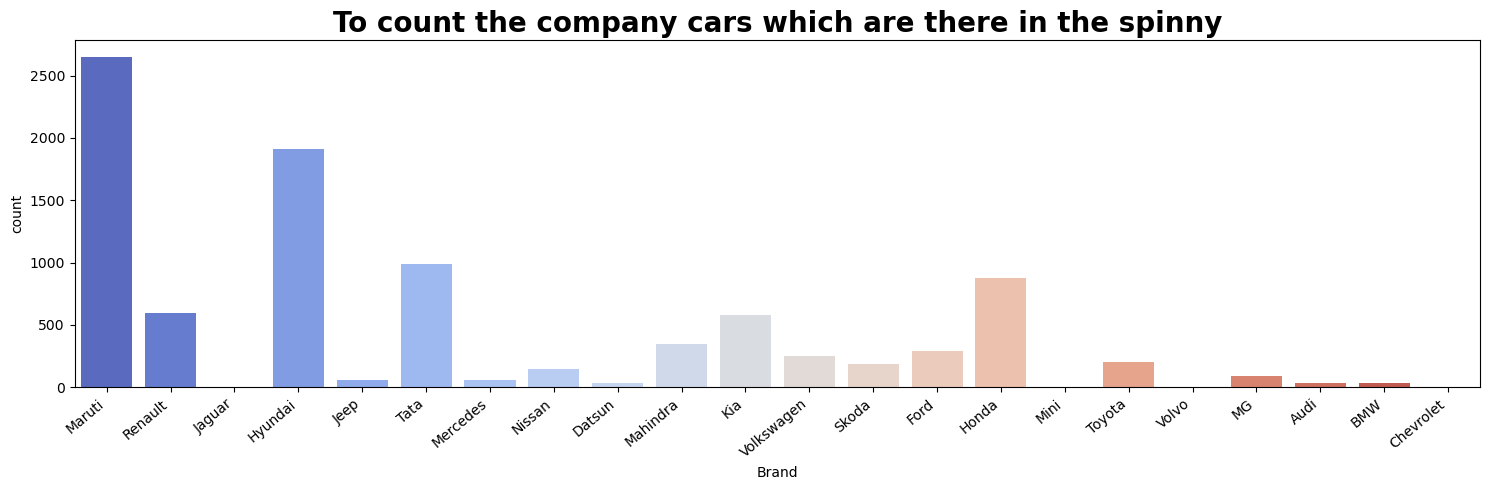

In [285]:
fig=plt.figure(figsize=(15,5))

k=sns.countplot(x='Brand',hue='Brand',data=df, palette='coolwarm',legend=False)

y=k.set_xticklabels(k.get_xticklabels(), rotation=40, ha="right")
y=plt.title("To count the company cars which are there in the spinny",fontsize=20,fontweight="bold")
plt.tight_layout()
plt.show(y)

#### Insights

##### above countplot displays number of cars are available in the dataset
##### which company have more listing in Brand wise we can see above chart

### Analysis Year and Transmission

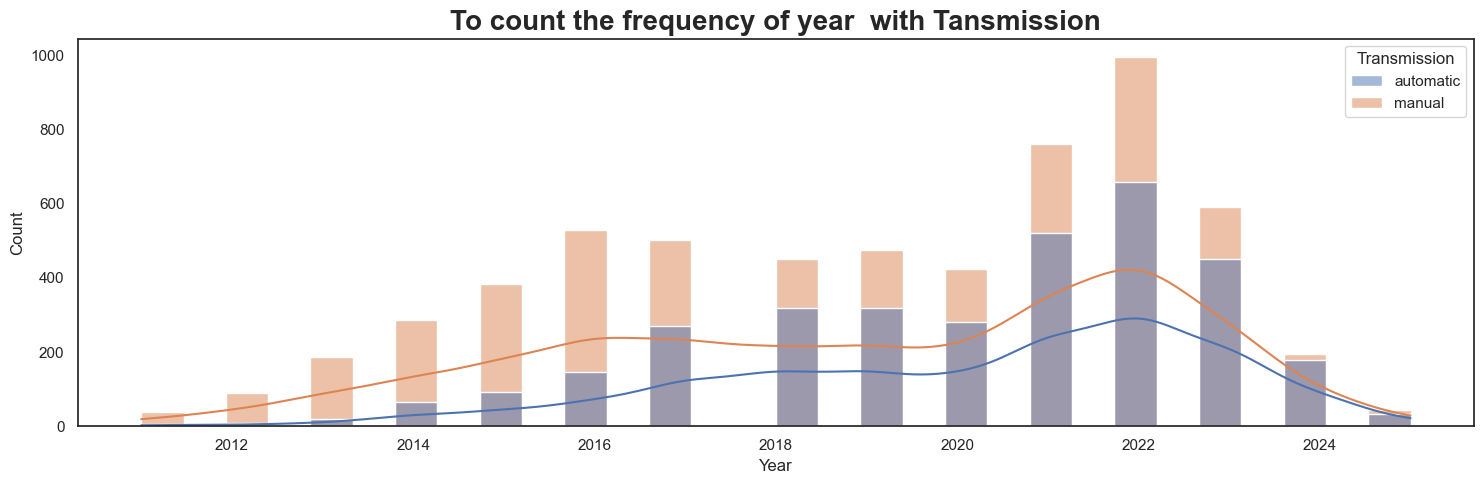

In [286]:
fig=plt.figure(figsize=(15,5))


fig=sns.set(style="white")

fig=sns.histplot(data=df, x="Year", kde=True,color='viridis',hue='Transmission')
fig=fig.set_title("To count the frequency of year  with Tansmission",fontsize=20,fontweight="bold")
fig=plt.tight_layout()
plt.show(fig)

#### Insights

##### above histplot is displays a frequency distribution year with transmission

### Analysis on City 

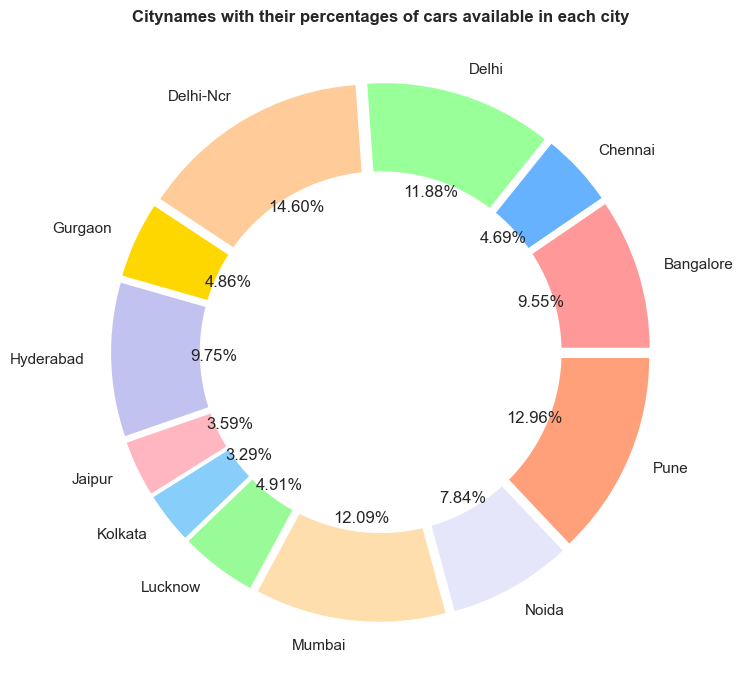

In [287]:
import matplotlib.pyplot as plt

# Pastel colors for better look
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', 
          '#C2C2F0', '#FFB6C1', '#87CEFA', '#98FB98', '#FFDEAD',
          '#E6E6FA', '#FFA07A']

plt.figure(figsize=(10,7))

explode = (0.05,) * 12  # same explode for all slices

df.groupby('City').size().plot(
    kind='pie',
    autopct='%.2f%%',
    explode=explode,
    colors=colors
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Citynames with their percentages of cars available in each city", 
          fontsize=12, fontweight="bold")
plt.ylabel('')  # remove y-axis label
plt.tight_layout()
plt.show()


#### Insights

##### The pie chart illustrates the proportion of used cars listed across various cities.
##### It helps identify which cities contribute most to the dataset.
##### matropolian city have a mores in dataset

### Analysis on Fuel Distribution

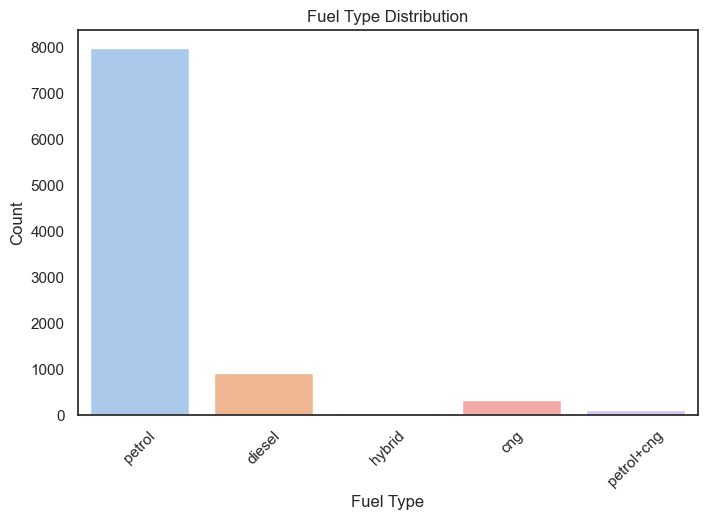

In [288]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Fuel', data=df, palette='pastel')  # Try 'Set1', 'pastel', 'dark', etc.
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Insights

##### the countplot displays Fuel type distribution 
##### majorly the petrol cars are we have more in snippy used cars
##### cng and hybrid are very less count 

### Analysis on year 

C:\Users\mbdin\AppData\Local\Temp\ipykernel_18768\3132713385.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  k.set_xticklabels(k.get_xticklabels(), rotation=40, ha="right")


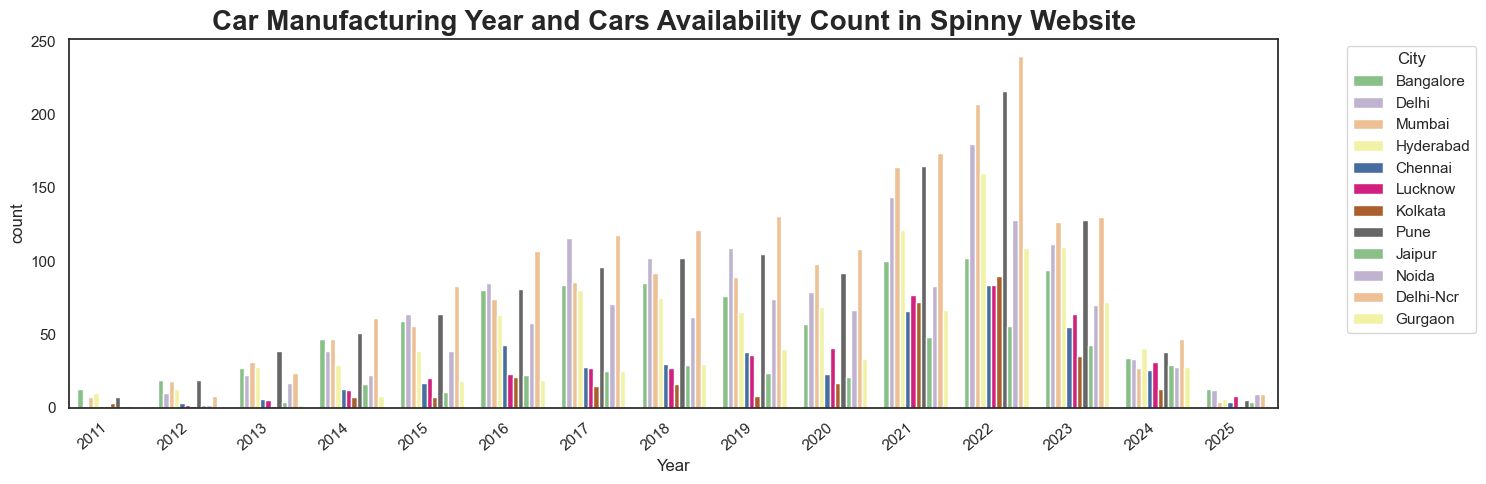

In [289]:
# fig=plt.figure(figsize=(15,5))

# k=sns.countplot(x='Year',hue='City',data=df, palette='husl',legend=False)

# y=k.set_xticklabels(k.get_xticklabels(), rotation=40, ha="right")
# y=plt.title("Car Manufacturing Year and Cars Avaliabulity Count in spinny website",fontsize=20,fontweight="bold")
# plt.tight_layout()
# plt.show(y)



fig = plt.figure(figsize=(15,5))
k = sns.countplot(x='Year', hue='City', data=df, palette='Accent', legend=True)
k.set_xticklabels(k.get_xticklabels(), rotation=40, ha="right")
plt.title("Car Manufacturing Year and Cars Availability Count in Spinny Website",
          fontsize=20, fontweight="bold")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Insights

##### The distribution of car manufacturing years helps us understand the age profile of used cars in the market.
##### Above countplot displays Year of manufacturing
##### 2021 and 2022 year of cars have more used cars to sell

 # Bivariate Analysis 

### Analysis on Year and Fuel

C:\Users\mbdin\AppData\Local\Temp\ipykernel_18768\1345573135.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  y=k.set_xticklabels(k.get_xticklabels(), rotation=40, ha="right")


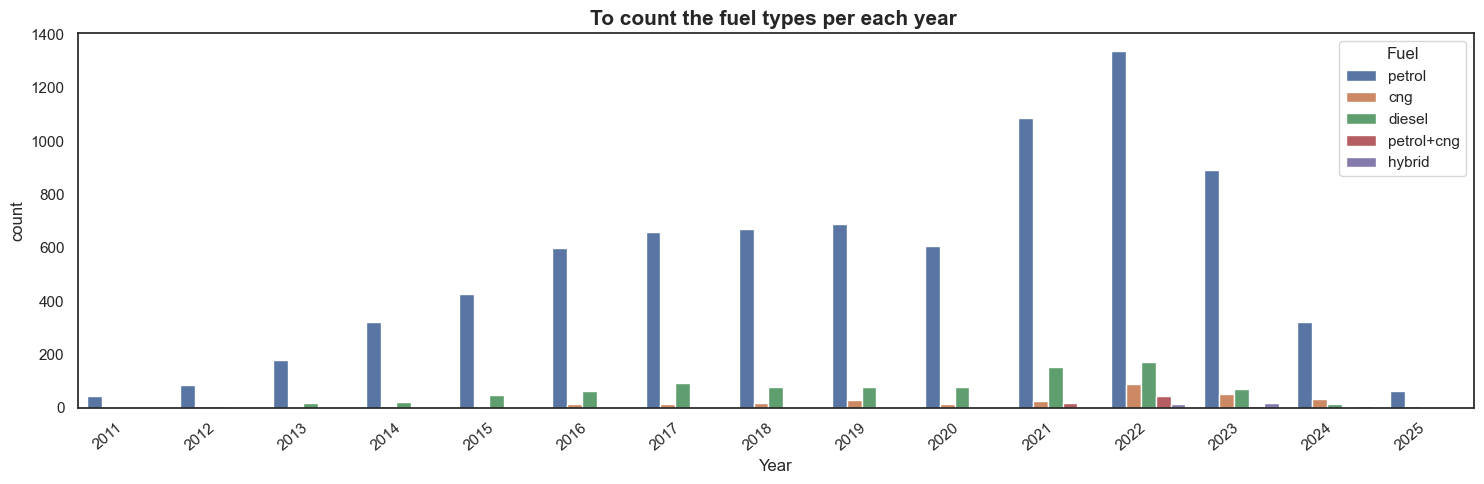

In [290]:
fig=plt.figure(figsize=(15,5))

k=sns.countplot(x='Year',data=df,hue="Fuel");
y=k.set_xticklabels(k.get_xticklabels(), rotation=40, ha="right")
k=plt.title("To count the fuel types per each year ",fontsize=15,fontweight="bold")
plt.tight_layout()
plt.show()

### Insights

##### analyzing how fuel type distribution changes across years.
##### above countplot petrol is dominating in dataset.
#####  cng and hybrid are less used cars

### Analysis on Year and KMS

Text(0.5, 1.0, 'Price vs Kilometers Driven')

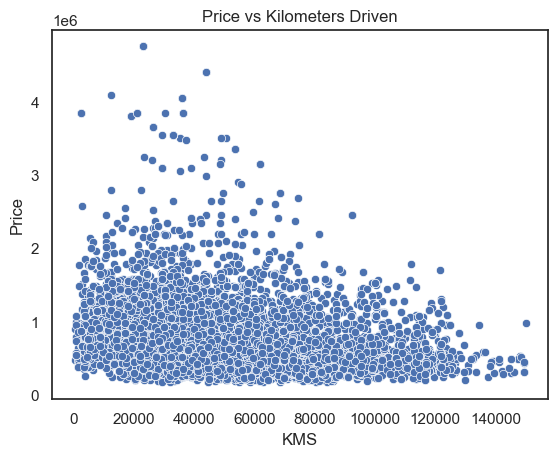

In [291]:
sns.scatterplot(x='KMS', y='Price', data=df)
plt.title("Price vs Kilometers Driven")


#### Insights

#### Above scater plot displays a distrubtion 
#### Price decreases as KMS increases

### analysis on Price and KMS

<Figure size 1500x500 with 0 Axes>

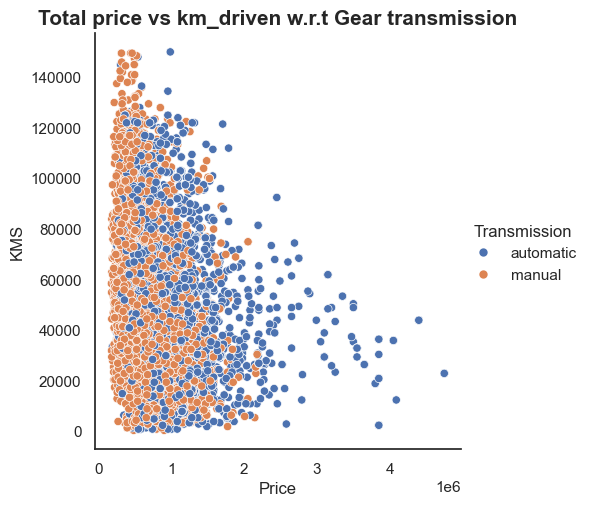

In [292]:
k=plt.figure(figsize=(15,5))
k=sns.relplot(x="Price", y="KMS", hue="Transmission", 
           data=df);
k=plt.title("Total price vs km_driven w.r.t Gear transmission",fontsize=15,fontweight="bold")


### Insights

##### Manual cars cover a wider range of kilometers and are spread across more price points, while automatic cars tend to cluster in lower km ranges, possibly indicating they are newer or more premium models.

### Analysis on Brand and KMS with TRans

C:\Users\mbdin\AppData\Local\Temp\ipykernel_18768\409218813.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  y=k.set_xticklabels(k.get_xticklabels(), rotation=40, ha="right")


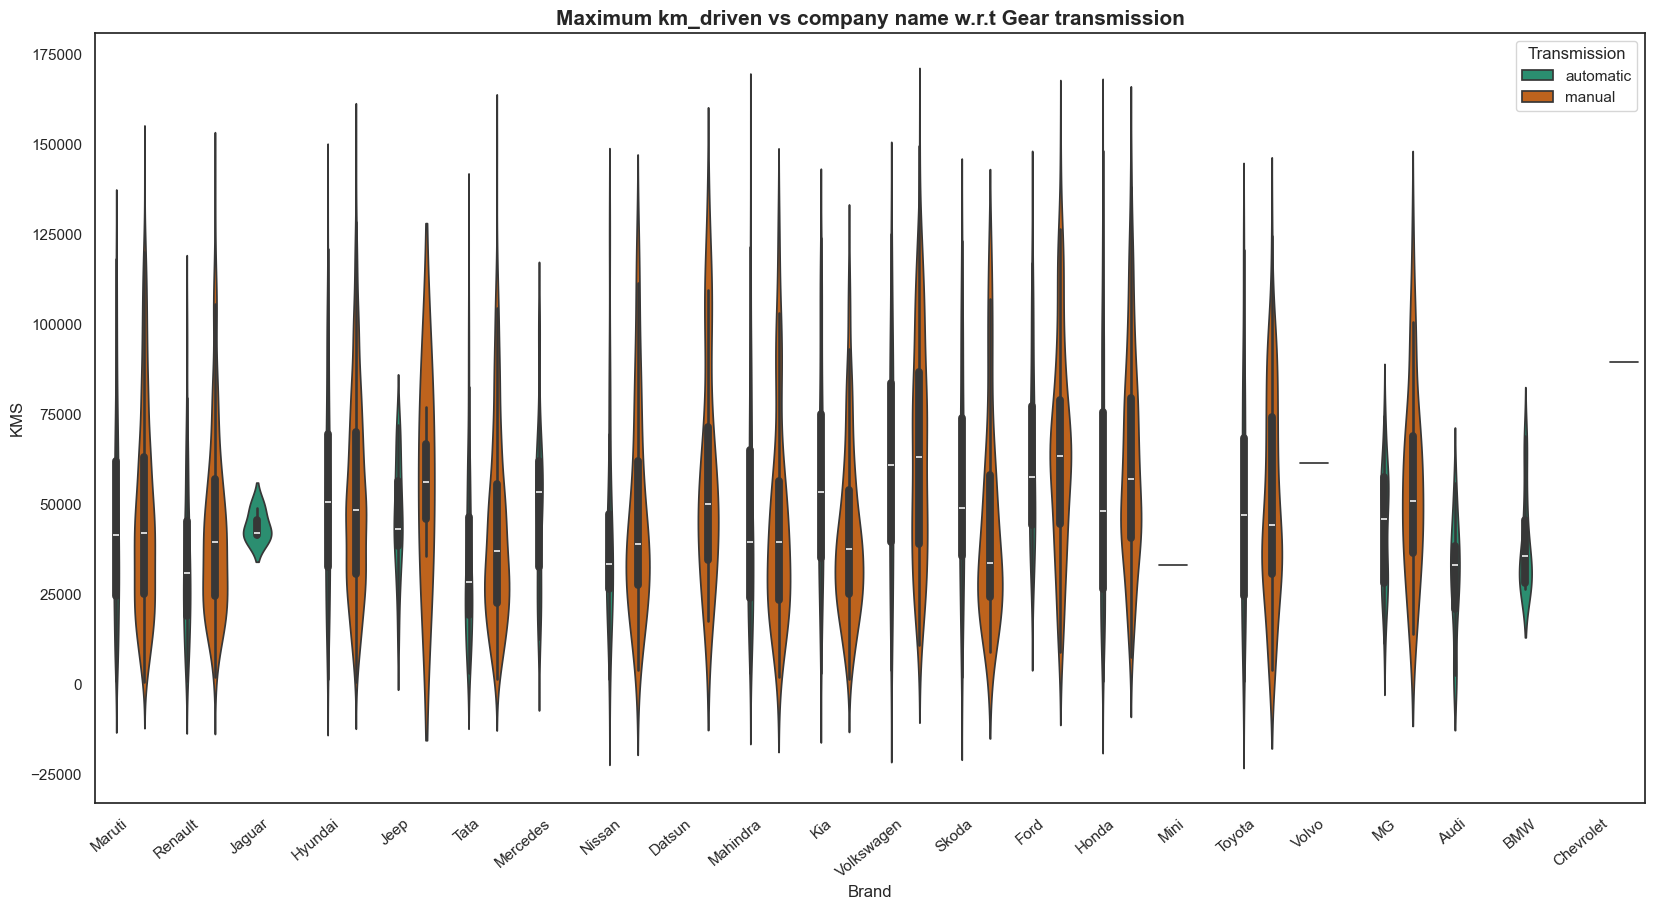

In [293]:
k=plt.figure(figsize=(20,10))
k = sns.violinplot(x="Brand", y="KMS", hue="Transmission", # if dont want -ve value put cut=0
                    data=df, palette="Dark2")
y=k.set_xticklabels(k.get_xticklabels(), rotation=40, ha="right")
k=plt.title("Maximum km_driven vs company name w.r.t Gear transmission",fontsize=15,fontweight="bold")

#### Insights

##### This violin plot compares the distribution of kilometers driven  for different car brands, split by gear transmission type.
##### most of used cars are manual transmission 
##### some brands only are ther in automatic(mercedes,audi,jeep,volve)

C:\Users\mbdin\AppData\Local\Temp\ipykernel_18768\2827317915.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  y=k.set_xticklabels(k.get_xticklabels(), rotation=40, ha="right")


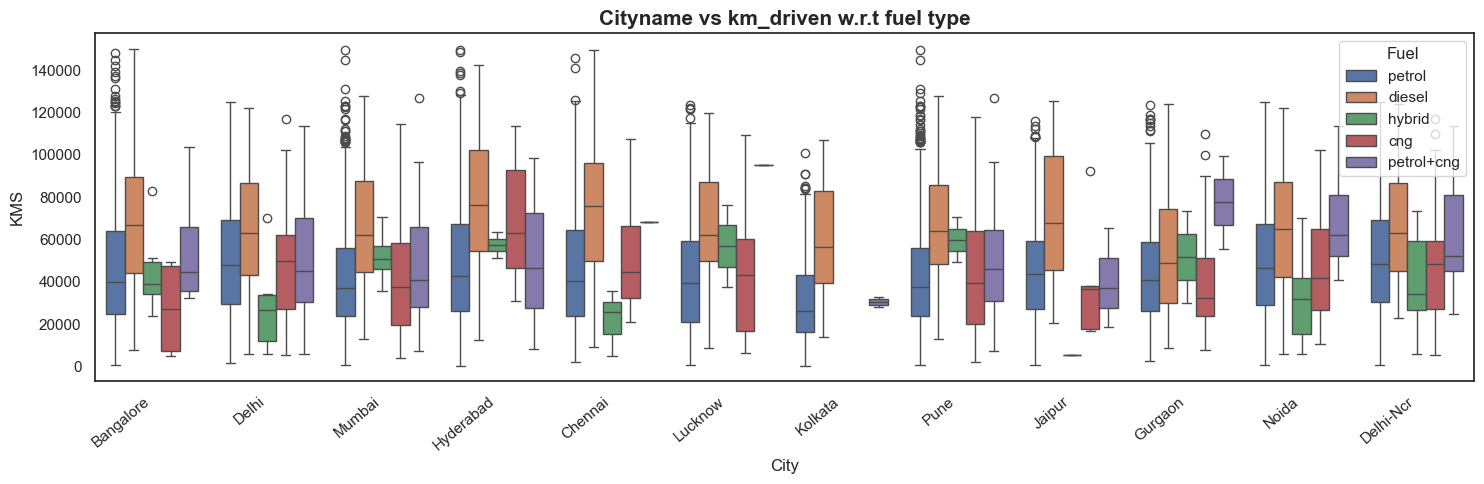

In [294]:
fig=plt.figure(figsize=(15,5))
k=sns.boxplot(x='City',y="KMS",hue="Fuel",data=df)

y=k.set_xticklabels(k.get_xticklabels(), rotation=40, ha="right")

k=plt.title("Cityname vs km_driven w.r.t fuel type",fontsize=15,fontweight="bold")
plt.tight_layout()
plt.show(y)

#### Insights

##### The boxplot shows how kilometers driven (KMS) varies by city and fuel type.
##### In cities like Delhi and Mumbai, diesel and CNG cars often have higher KMS—suggesting they are used more intensively, possibly for commercial or long-distance travel.

## Groupby aggregation operation

#### Top 10 cars highest price 

In [295]:
top_10car = df.groupby("Brand")['Price'].max().nlargest(10)
top10 = pd.DataFrame(top_10car)

In [296]:
top10_car = pd.merge(top10,df,on = "Price")
top10_car

,Price,Brand,Model and Variant,Year,City,KMS,Fuel,Transmission,Emi
0,4750000.0,Mercedes,C-ClassC 200,2023,Delhi,23000.0,petrol,automatic,81696
1,4750000.0,Mercedes,C-ClassC 200,2023,Jaipur,23000.0,petrol,automatic,81696
2,4750000.0,Mercedes,C-ClassC 200,2023,Gurgaon,23000.0,petrol,automatic,81696
3,4750000.0,Mercedes,C-ClassC 200,2023,Noida,23000.0,petrol,automatic,81696
4,4750000.0,Mercedes,C-ClassC 200,2023,Delhi-Ncr,23000.0,petrol,automatic,81696
5,4400000.0,Audi,Q5Premium Plus 45 TFSI,2023,Delhi,44000.0,petrol,automatic,75676
6,4400000.0,Audi,Q5Premium Plus 45 TFSI,2023,Jaipur,44000.0,petrol,automatic,75676
7,4400000.0,Audi,Q5Premium Plus 45 TFSI,2023,Gurgaon,44000.0,petrol,automatic,75676
8,4400000.0,Audi,Q5Premium Plus 45 TFSI,2023,Noida,44000.0,petrol,automatic,75676
9,4400000.0,Audi,Q5Premium Plus 45 TFSI,2023,Delhi-Ncr,44000.0,petrol,automatic,75676


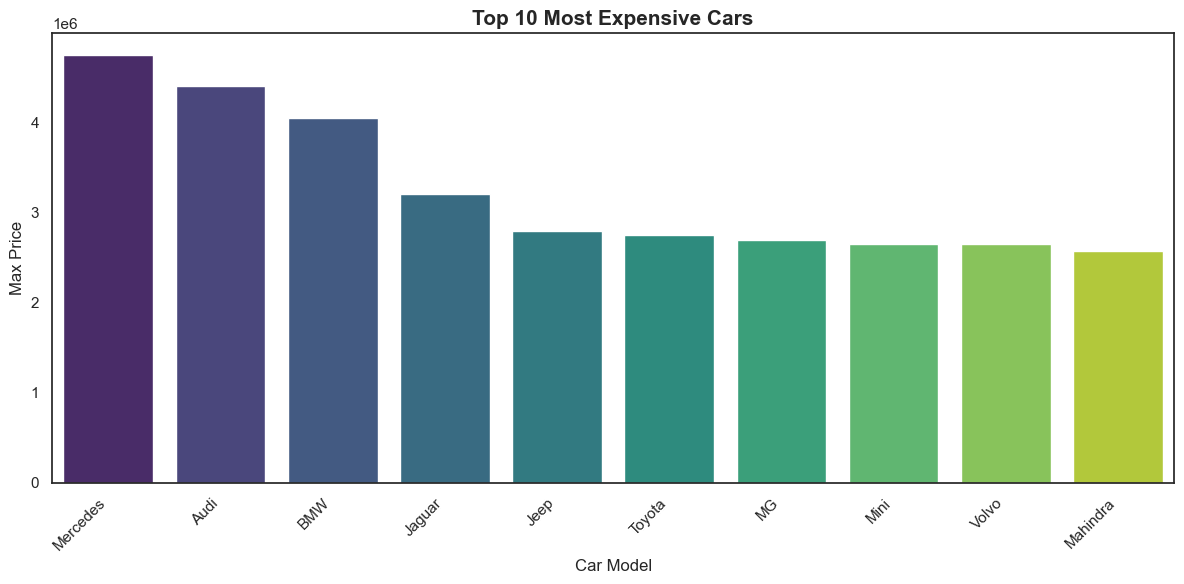

In [297]:
plt.figure(figsize=(12,6))
sns.barplot(x=top10.index, y='Price', data=top10, palette='viridis')
plt.title('Top 10 Most Expensive Cars', fontsize=15, fontweight='bold')
plt.xlabel('Car Model')
plt.ylabel('Max Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Here we can find high price cars in which city

In [298]:
Top=df.groupby(["City"])[["Price","KMS","Brand","Model and Variant","Transmission","Fuel"]].max()
Top=pd.DataFrame(Top)
Top=Top.reset_index()
Top


,City,Price,KMS,Brand,Model and Variant,Transmission,Fuel
0,Bangalore,3500000.0,150000.0,Volvo,i20Sportz 1.4 CRDI,manual,petrol+cng
1,Chennai,2600000.0,149500.0,Volkswagen,i20 N LineN8 1.0 Turbo DCT,manual,petrol+cng
2,Delhi,4750000.0,125000.0,Volkswagen,i20Sportz 1.0 Turbo DCT,manual,petrol+cng
3,Delhi-Ncr,4750000.0,125000.0,Volkswagen,i20Sportz 1.2 MT,manual,petrol+cng
4,Gurgaon,4750000.0,124000.0,Volkswagen,i20 N LineN8 1.0 Turbo DCT,manual,petrol+cng
5,Hyderabad,4090000.0,149500.0,Volkswagen,i20Magna 1.4 CRDI,manual,petrol+cng
6,Jaipur,4750000.0,125500.0,Volkswagen,i20Asta 1.2 MT,manual,petrol+cng
7,Kolkata,1801000.0,107000.0,Volkswagen,i20Sportz 1.2 IVT,manual,petrol+cng
8,Lucknow,2749000.0,123500.0,Volkswagen,i20Sportz 1.2,manual,petrol+cng
9,Mumbai,3550000.0,149500.0,Volkswagen,i20Sportz 1.2,manual,petrol+cng


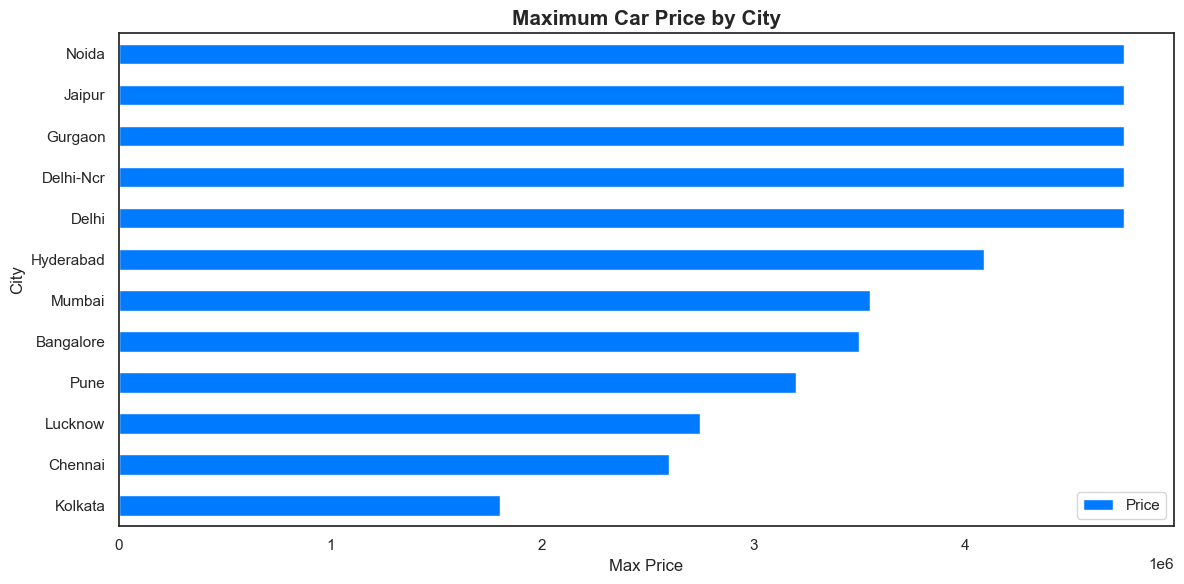

In [299]:
Top.sort_values('Price').plot(kind='barh', x='City', y='Price', figsize=(12, 6), color='#007bff')
plt.title("Maximum Car Price by City", fontsize=15, fontweight="bold")
plt.xlabel("Max Price")
plt.ylabel("City")
plt.tight_layout()
plt.show()


#### Here we find low price cars in which city

In [300]:
low=df.groupby(["City"])[["Price","KMS","Brand","Model and Variant","Transmission","Fuel"]].min()
low=pd.DataFrame(low)
low=low.reset_index()
low

,City,Price,KMS,Brand,Model and Variant,Transmission,Fuel
0,Bangalore,177000.0,1000.0,Datsun,AlcazarPlatinum 7 STR 1.5 Diesel,automatic,cng
1,Chennai,248000.0,2000.0,BMW,5 Series520d Luxury Line,automatic,cng
2,Delhi,177000.0,1500.0,Audi,2 Series Gran Coupe220i M Sport,automatic,cng
3,Delhi-Ncr,177000.0,1000.0,Audi,2 Series Gran Coupe220i M Sport,automatic,cng
4,Gurgaon,205000.0,2500.0,Audi,2 Series Gran Coupe220i M Sport,automatic,cng
5,Hyderabad,178000.0,500.0,BMW,3 Series320d M Sport,automatic,cng
6,Jaipur,210000.0,1000.0,Audi,2 Series Gran Coupe220i M Sport,automatic,cng
7,Kolkata,174000.0,500.0,Datsun,A-StarLxi,automatic,diesel
8,Lucknow,172000.0,1000.0,Datsun,Alto 800LXi,automatic,cng
9,Mumbai,194000.0,1000.0,Audi,5 Series520d Luxury Line,automatic,cng


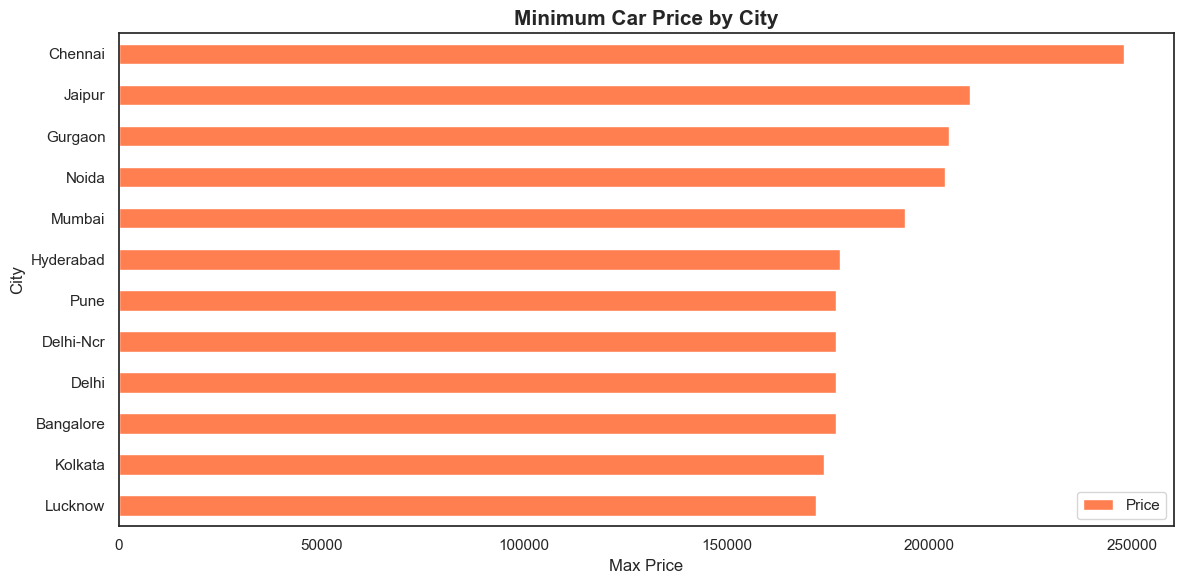

In [301]:
low.sort_values('Price').plot(kind='barh', x='City', y='Price', figsize=(12, 6), color='coral')
plt.title("Minimum Car Price by City", fontsize=15, fontweight="bold")
plt.xlabel("Max Price")
plt.ylabel("City")
plt.tight_layout()
plt.show()


### Continuous to Continuous Variable: Correlation Plot

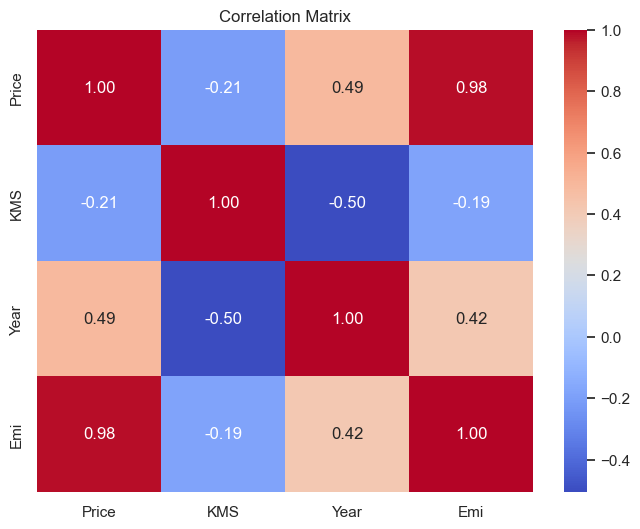

In [302]:
col = ['Price', 'KMS','Year','Emi'] 
corr_matrix = df[col].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Insights

Price & EMI: Strong positive correlation (0.96) – higher price means higher EMI.

Price & Year: Moderate positive (0.53) – newer cars cost more.

Price & KMS: Weak negative (-0.20) – more driven cars are slightly cheaper.

Year & KMS: Moderate negative (-0.48) – newer cars have fewer kilometers.

Year & EMI: Moderate positive (0.40) – newer cars tend to have higher EMI.

#### Crosstab between Fuel and Transmission

In [303]:
ct = pd.crosstab(df['Fuel'], df['Transmission'])
ct_percent = pd.crosstab(df['Fuel'], df['Transmission'], normalize='index') * 100

print(ct)
print(ct_percent.round(2))

Transmission  automatic  manual
Fuel                           
cng                   2     315
diesel              340     557
hybrid               40       2
petrol             2987    4992
petrol+cng            0      89
Transmission  automatic  manual
Fuel                           
cng                0.63   99.37
diesel            37.90   62.10
hybrid            95.24    4.76
petrol            37.44   62.56
petrol+cng         0.00  100.00


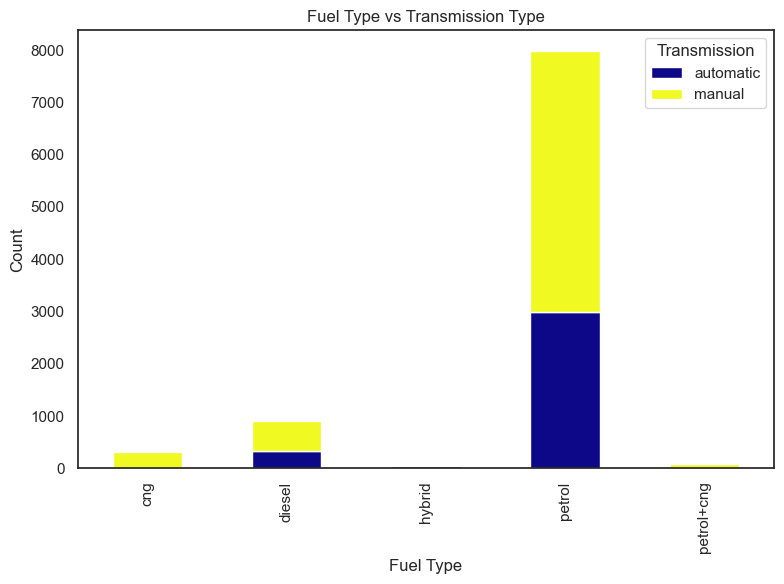

In [304]:
ct.plot(kind='bar', stacked=True, colormap='plasma', figsize=(8,6))
plt.title('Fuel Type vs Transmission Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.legend(title='Transmission')
plt.tight_layout()
plt.show()

To examine the frequency distribution or relationship between two categorical variables.